In [100]:
import os
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st


In [101]:
annualfed_path = os.path.join("resources", "Fedfunds.csv")

with open(annualfed_path , newline="") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=",")

In [102]:
#Load and read fedfunds csv
data = pd.read_csv("resources/Fedfunds.csv")
data_fed = data
data_fed['DATE'] = pd.to_datetime(data_fed['DATE'])
data_fed = data_fed.groupby([data_fed['DATE'].dt.strftime('%Y-%m')])['FED RATES'].last().reset_index()


In [103]:
data_fed.head()

,DATE,FED RATES
0,2017-01,0.65
1,2017-02,0.66
2,2017-03,0.79
3,2017-04,0.90
4,2017-05,0.91


In [104]:
mtg30_path = os.path.join("resources", "Mtg30.csv")

with open(annualfed_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/Mtg30.csv")
data_mtg30 = data
data_mtg30['DATE'] = pd.to_datetime(data_fed['DATE'])
data_mtg30 = data_mtg30.groupby([data_mtg30 ['DATE'].dt.strftime('%Y-%m')])['Mtg30'].last().reset_index()
data_mtg30.head()

,DATE,Mtg30
0,2017-01,4.20
1,2017-02,4.12
2,2017-03,4.09
3,2017-04,4.19
4,2017-05,4.19


In [105]:
#merge the fed rates and 30 year mtg rate
rates_df = pd.merge(data_fed, data_mtg30, on=["DATE"])


rates_df["FED RATES"] = rates_df["FED RATES"].astype(float)
rates_df["Mtg30"] = rates_df["Mtg30"].astype(float)
rates_df['DATE'] = pd.to_datetime(rates_df['DATE'])

rates_df = rates_df.loc[rates_df['DATE'] >= '1/1/2018']

rates_df. head()



,DATE,FED RATES,Mtg30
12,2018-01-01,1.41,4.14
13,2018-02-01,1.42,4.10
14,2018-03-01,1.51,4.08
15,2018-04-01,1.69,3.97
16,2018-05-01,1.70,4.03


In [106]:
#Convert the Mtg15 file
mtg15_path = os.path.join("resources", "Mtg15.csv")

with open(mtg15_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/Mtg15.csv")
data_mtg15 = data
data_mtg15['DATE'] = pd.to_datetime(data_mtg15['DATE'])
data_mtg15 = data_mtg15.groupby([data_mtg15 ['DATE'].dt.strftime('%Y-%m')])['Mtg15'].last().reset_index()
data_mtg15.head()

,DATE,Mtg15
0,2017-01,3.40
1,2017-02,3.37
2,2017-03,3.39
3,2017-04,3.27
4,2017-05,3.19


In [107]:
#merge the the file
rates1_df = pd.merge(pd.merge(data_fed, data_mtg30, on='DATE'),data_mtg15, on= 'DATE')

rates1_df = rates1_df.loc[rates1_df['DATE'] >= '1/1/2018']
rates1_df.head()

,DATE,FED RATES,Mtg30,Mtg15
0,2017-01,0.65,4.20,3.40
1,2017-02,0.66,4.12,3.37
2,2017-03,0.79,4.09,3.39
3,2017-04,0.90,4.19,3.27
4,2017-05,0.91,4.19,3.19


In [108]:
#Convert the MtgFHA file
mtgfha_path = os.path.join("resources", "MtgFHA.csv")

with open(mtgfha_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/MtgFHA.csv")
data_mtgfha = data
data_mtgfha['DATE'] = pd.to_datetime(data_mtgfha['DATE'])
data_mtgfha = data_mtgfha.groupby([data_mtgfha ['DATE'].dt.strftime('%Y-%m')])['FHA 30'].last().reset_index()
data_mtgfha.head()

,DATE,FHA 30
0,2017-01,4.275
1,2017-02,4.215
2,2017-03,4.313
3,2017-04,4.231
4,2017-05,4.159


In [109]:
#merge the the file
rates2_df = pd.merge(pd.merge(pd.merge(data_fed, data_mtg30, on='DATE'),data_mtg15, on= 'DATE'),data_mtgfha, on= 'DATE')

rates2_df = rates2_df.loc[rates2_df['DATE'] >= '1/1/2018']
rates2_df.head()

,DATE,FED RATES,Mtg30,Mtg15,FHA 30
0,2017-01,0.65,4.20,3.40,4.275
1,2017-02,0.66,4.12,3.37,4.215
2,2017-03,0.79,4.09,3.39,4.313
3,2017-04,0.90,4.19,3.27,4.231
4,2017-05,0.91,4.19,3.19,4.159


In [110]:
#Convert the MtgJumbo file
mtgjumbo_path = os.path.join("resources", "MtgJumbo.csv")

with open(mtgjumbo_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/MtgJumbo.csv")
data_mtgjumbo = data
data_mtgjumbo['DATE'] = pd.to_datetime(data_mtgjumbo['DATE'])
data_mtgjumbo = data_mtgjumbo.groupby([data_mtgjumbo ['DATE'].dt.strftime('%Y-%m')])['Jumbo30'].last().reset_index()
data_mtgjumbo.head()

,DATE,Jumbo30
0,2017-12,4.18
1,2018-01,4.428
2,2018-02,4.593
3,2018-03,4.447
4,2018-04,4.648


In [111]:
#merge the the file
rates3_df = pd.merge(pd.merge(pd.merge(pd.merge(data_fed, data_mtg30, on='DATE'),data_mtg15, on= 'DATE'),data_mtgfha, on= 'DATE'),data_mtgjumbo, on= 'DATE')

rates3_df = rates3_df.loc[rates3_df['DATE'] >= '1/1/2018']
rates3_df.head()

,DATE,FED RATES,Mtg30,Mtg15,FHA 30,Jumbo30
0,2017-12,1.30,4.23,3.44,4.288,4.18
1,2018-01,1.41,4.14,3.62,4.556,4.428
2,2018-02,1.42,4.10,3.85,4.837,4.593
3,2018-03,1.51,4.08,3.90,4.788,4.447
4,2018-04,1.69,3.97,4.02,4.959,4.648


In [112]:
# rates4_df = rates3_df.dropna()
# rates4_df

In [113]:
#write data to csv
# rates3_df.to_csv("mtgrates.csv")

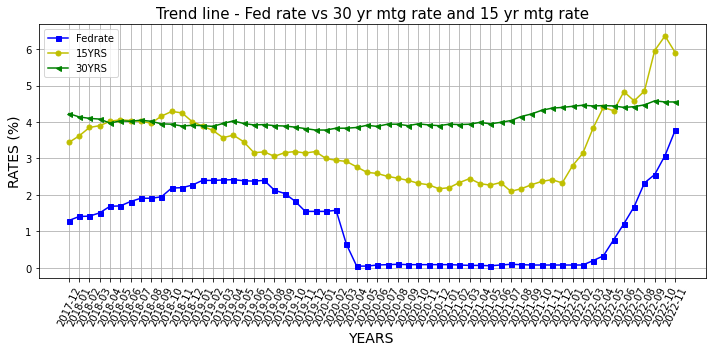

In [114]:


x1 = rates3_df['DATE']
y1 = rates3_df['FED RATES']
y2 = rates3_df['Mtg15']
y3= rates3_df['Mtg30']


fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(x1, y1, markersize=5,marker="s",color="b", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="y", label= "15YRS")
plt.plot(x1, y3, markersize=5,marker="<",color="g", label= "30YRS")

plt.title('Trend line - Fed rate vs 30 yr mtg rate and 15 yr mtg rate',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('RATES (%)',fontsize =14)
plt.xticks(rotation = 65)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



In [115]:
from scipy.stats import linregress

The r-value is: 0.7650491063754941


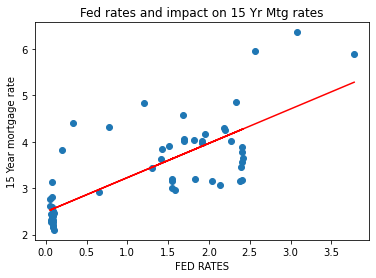

In [116]:

x = rates3_df['FED RATES']
y = rates3_df['Mtg15']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
#plt.annotate(line_eq, (50,60), fontsize=15,color="red")
plt.xlabel('FED RATES')
plt.ylabel('15 Year mortgage rate')
plt.title('Fed rates and impact on 15 Yr Mtg rates')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.03243626322455816


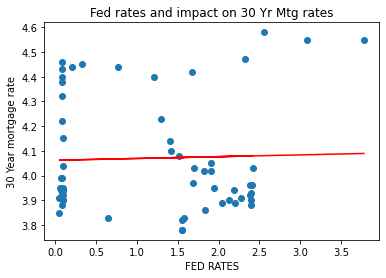

In [117]:

x = rates3_df['FED RATES']
y = rates3_df['Mtg30']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
#plt.annotate(line_eq, (50,60), fontsize=15,color="red")
plt.xlabel('FED RATES')
plt.ylabel('30 Year mortgage rate')
plt.title('Fed rates and impact on 30 Yr Mtg rates')
print(f"The r-value is: {rvalue}")
plt.show()




In [138]:
#Creating a year column.  
rates3_df['year'] = pd.DatetimeIndex(rates3_df['DATE']).year

#Filter on #2020-2022
year = [2020, 2021, 2022]
rates3_df= rates3_df.loc[rates3_df['year'].isin(year)]
rates3_df = rates3_df.sort_values('year')
rates3_df.head()

,DATE,FED RATES,Mtg30,Mtg15,FHA 30,Jumbo30,year
25,2020-01,1.55,3.78,3.00,3.834,3.735,2020
30,2020-06,0.08,3.88,2.59,3.158,3.31,2020
26,2020-02,1.58,3.83,2.95,3.687,3.581,2020
27,2020-03,0.65,3.83,2.92,3.513,3.713,2020
29,2020-05,0.05,3.91,2.62,3.31,3.475,2020


In [135]:
prices_csv = ("resources/listings.csv")

# Read with Pandas
prices_df= pd.read_csv(prices_csv)
prices_df.head()

,Unnamed: 0,period_begin,period_end,region,property_type,median_sale_price,median_sale_price_yoy,median_list_price,median_list_price_yoy,new_listings,new_listings_yoy,county,year,date
0,336,2020-01-01,2020-01-31,"Caldwell County, TX",All Residential,242500.0,0.227848,221950.0,-0.111845,34.0,0.030303,Caldwell County,2020,2020-01-31
1,87,2020-01-01,2020-01-31,"Williamson County, TX",All Residential,278500.0,0.022018,290000.0,0.038459,982.0,0.112118,Williamson County,2020,2020-01-31
2,1014,2020-01-01,2020-01-31,"Bastrop County, TX",All Residential,250000.0,0.094571,263387.0,0.173216,100.0,0.176471,Bastrop County,2020,2020-01-31
3,2442,2020-01-01,2020-01-31,"Travis County, TX",All Residential,353000.0,0.069697,398745.0,0.123241,1536.0,-0.007752,Travis County,2020,2020-01-31
4,2429,2020-01-01,2020-01-31,"Hays County, TX",All Residential,256000.0,-0.035236,290495.0,0.098280,348.0,0.023529,Hays County,2020,2020-01-31


In [120]:
# print(prices_df).info

In [142]:
mtgprice_df = prices_df.filter(['date', 'median_sale_price_yoy', 'year'])
mtgprice_df


,date,median_sale_price_yoy,year
0,2020-01-31,0.227848,2020
1,2020-01-31,0.022018,2020
2,2020-01-31,0.094571,2020
3,2020-01-31,0.069697,2020
4,2020-01-31,-0.035236,2020
...,...,...,...
165,2022-10-31,0.020000,2022
166,2022-10-31,0.069767,2022
167,2022-10-31,0.028381,2022
168,2022-10-31,0.040605,2022


In [140]:
mtgprice_1 = pd.merge(mtgprice_df, rates3_df, on='year')

mtgprice_1

,date,median_sale_price_yoy,year,DATE,FED RATES,Mtg30,Mtg15,FHA 30,Jumbo30
0,2020-01-31,0.227848,2020,2020-01,1.55,3.78,3.00,3.834,3.735
1,2020-01-31,0.227848,2020,2020-06,0.08,3.88,2.59,3.158,3.31
2,2020-01-31,0.227848,2020,2020-02,1.58,3.83,2.95,3.687,3.581
3,2020-01-31,0.227848,2020,2020-03,0.65,3.83,2.92,3.513,3.713
4,2020-01-31,0.227848,2020,2020-05,0.05,3.91,2.62,3.31,3.475
...,...,...,...,...,...,...,...,...,...
1985,2022-10-31,0.048333,2022,2022-07,1.68,4.42,4.58,5.269,5.024
1986,2022-10-31,0.048333,2022,2022-08,2.33,4.47,4.85,5.656,5.572
1987,2022-10-31,0.048333,2022,2022-09,2.56,4.58,5.96,6.524,6.491
1988,2022-10-31,0.048333,2022,2022-10,3.08,4.55,6.36,6.854,6.778
